# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"""http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"""

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url +"&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response=requests.get(city_url)
        response_j=response.json()
        # Parse the JSON and retrieve data
        city_weather = response_j['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response_j['coord']['lat']
        city_lng = response_j['coord']['lon']
        city_max_temp = response_j['main']['temp_max']
        city_humidity = response_j['main']['humidity']
        city_clouds = response_j['clouds']['all']
        city_wind = response_j['wind']['speed']
        city_country = response_j['sys']['country']
        city_date = response_j['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | abu dhabi
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | cidreira
Processing Record 5 of Set 1 | gurupi
Processing Record 6 of Set 1 | maniitsoq
Processing Record 7 of Set 1 | yulara
Processing Record 8 of Set 1 | tonekabon
Processing Record 9 of Set 1 | kyabe
Processing Record 10 of Set 1 | marihatag
Processing Record 11 of Set 1 | finnsnes
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | le moule
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | hasaki
Processing Record 16 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 17 of Set 1 | yanam
Processing Record 18 of Set 1 | dunkirk
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | lorengau
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | matar

Processing Record 36 of Set 4 | moerai
Processing Record 37 of Set 4 | rio grande
Processing Record 38 of Set 4 | vallenar
Processing Record 39 of Set 4 | porto novo
Processing Record 40 of Set 4 | mar del plata
Processing Record 41 of Set 4 | mackay
Processing Record 42 of Set 4 | nyimba
Processing Record 43 of Set 4 | oranjemund
Processing Record 44 of Set 4 | ponta do sol
Processing Record 45 of Set 4 | sambava
Processing Record 46 of Set 4 | west bay
Processing Record 47 of Set 4 | vila velha
Processing Record 48 of Set 4 | lompoc
Processing Record 49 of Set 4 | georgetown
Processing Record 0 of Set 5 | port macquarie
Processing Record 1 of Set 5 | cervo
Processing Record 2 of Set 5 | koeru
Processing Record 3 of Set 5 | addis abeba
Processing Record 4 of Set 5 | taua
Processing Record 5 of Set 5 | rocha
Processing Record 6 of Set 5 | ahipara
Processing Record 7 of Set 5 | montepuez
Processing Record 8 of Set 5 | pevek
Processing Record 9 of Set 5 | kaitangata
Processing Record 10 

Processing Record 27 of Set 8 | diffa
Processing Record 28 of Set 8 | saleaula
City not found. Skipping...
Processing Record 29 of Set 8 | maksi
Processing Record 30 of Set 8 | luanshya
Processing Record 31 of Set 8 | dunedin
Processing Record 32 of Set 8 | mayo
Processing Record 33 of Set 8 | carballo
Processing Record 34 of Set 8 | pagudpud
Processing Record 35 of Set 8 | kozhva
Processing Record 36 of Set 8 | sunrise manor
Processing Record 37 of Set 8 | halalo
City not found. Skipping...
Processing Record 38 of Set 8 | jieshi
Processing Record 39 of Set 8 | belaya gora
Processing Record 40 of Set 8 | tacambaro
City not found. Skipping...
Processing Record 41 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 42 of Set 8 | jojoima
Processing Record 43 of Set 8 | prestea
Processing Record 44 of Set 8 | zapolyarnyy
Processing Record 45 of Set 8 | kahului
Processing Record 46 of Set 8 | sumenep
Processing Record 47 of Set 8 | yuzhno-kurilsk
Processing Record 48 of Set 8 

Processing Record 10 of Set 12 | anadyr
Processing Record 11 of Set 12 | aklavik
Processing Record 12 of Set 12 | upata
Processing Record 13 of Set 12 | pedasi
Processing Record 14 of Set 12 | gazanjyk
Processing Record 15 of Set 12 | burica
City not found. Skipping...
Processing Record 16 of Set 12 | alofi
Processing Record 17 of Set 12 | bonavista
Processing Record 18 of Set 12 | borogontsy
Processing Record 19 of Set 12 | rawlins
Processing Record 20 of Set 12 | great falls
Processing Record 21 of Set 12 | solnechnyy
Processing Record 22 of Set 12 | kemijarvi
Processing Record 23 of Set 12 | saint-augustin
Processing Record 24 of Set 12 | kapit
Processing Record 25 of Set 12 | show low
Processing Record 26 of Set 12 | umm kaddadah
Processing Record 27 of Set 12 | djougou
Processing Record 28 of Set 12 | ocampo
Processing Record 29 of Set 12 | cockburn town
Processing Record 30 of Set 12 | canete
Processing Record 31 of Set 12 | morant bay
Processing Record 32 of Set 12 | ciudad boli

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-6.29,81,100,1.67,RU,1681441842
1,abu dhabi,24.4667,54.3667,28.30,70,0,3.60,AE,1681441450
2,barrow,71.2906,-156.7887,-16.99,71,0,4.63,US,1681441564
3,cidreira,-30.1811,-50.2056,18.47,86,100,4.69,BR,1681441850
4,gurupi,-11.7292,-49.0686,23.33,86,84,1.58,BR,1681441996


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-6.29,81,100,1.67,RU,1681441842
1,abu dhabi,24.4667,54.3667,28.30,70,0,3.60,AE,1681441450
2,barrow,71.2906,-156.7887,-16.99,71,0,4.63,US,1681441564
3,cidreira,-30.1811,-50.2056,18.47,86,100,4.69,BR,1681441850
4,gurupi,-11.7292,-49.0686,23.33,86,84,1.58,BR,1681441996


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

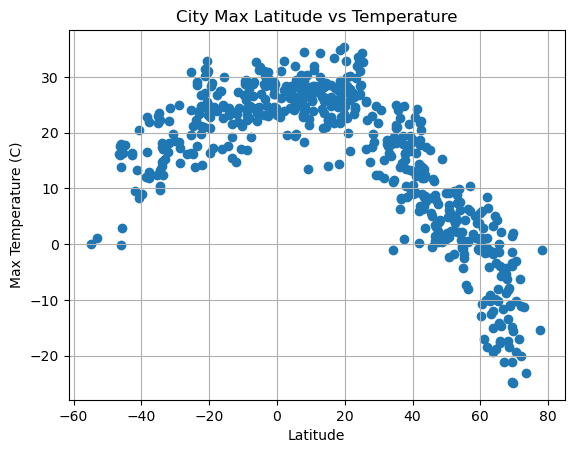

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('City Max Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

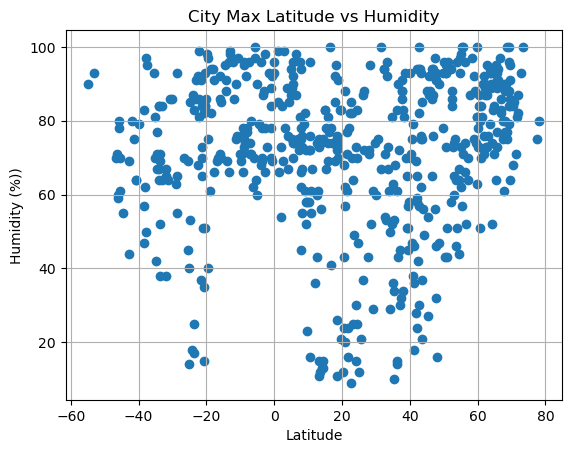

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('City Max Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%))')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

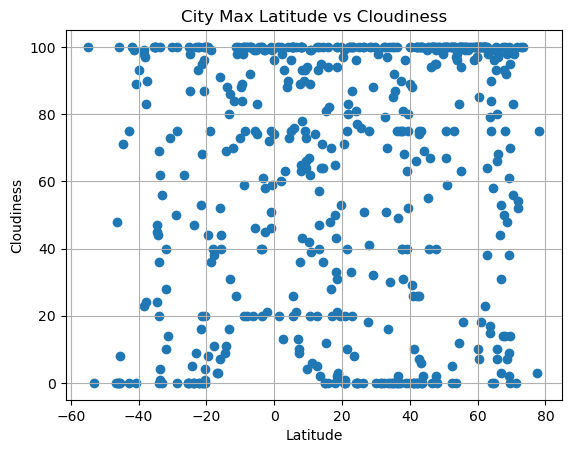

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('City Max Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

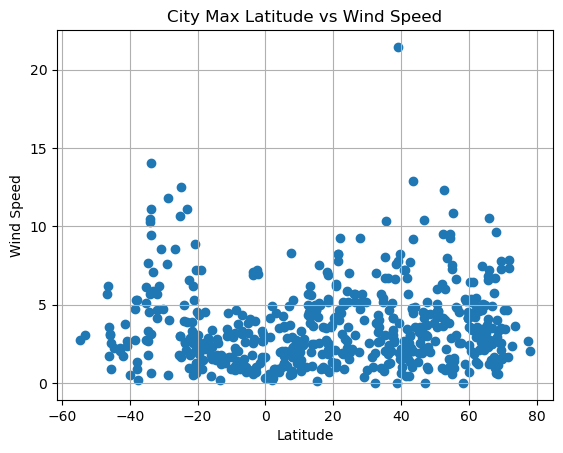

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Max Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def regression(x,y):
    res=linregress(x,y)
    plt.scatter(x,y)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
    equation = f"y = {res.intercept:.2f} + {res.slope:.2f}x"
    plt.annotate(equation, xy=(1, 1), fontsize=14, color='red', bbox=dict(facecolor='white', edgecolor='none'))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-6.29,81,100,1.67,RU,1681441842
1,abu dhabi,24.4667,54.3667,28.30,70,0,3.60,AE,1681441450
2,barrow,71.2906,-156.7887,-16.99,71,0,4.63,US,1681441564
5,maniitsoq,65.4167,-52.9000,-1.45,64,93,3.48,GL,1681441919
7,tonekabon,36.8163,50.8738,14.63,72,0,1.26,IR,1681441997


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,cidreira,-30.1811,-50.2056,18.47,86,100,4.69,BR,1681441850
4,gurupi,-11.7292,-49.0686,23.33,86,84,1.58,BR,1681441996
6,yulara,-25.2406,130.9889,30.89,40,100,10.65,AU,1681441996
12,rikitea,-23.1203,-134.9692,23.30,86,100,11.08,PF,1681441727
17,lorengau,-2.0226,147.2712,29.51,73,21,6.93,PG,1681441935


###  Temperature vs. Latitude Linear Regression Plot

In [15]:
northern_hemi_df['Lat'].name

'Lat'

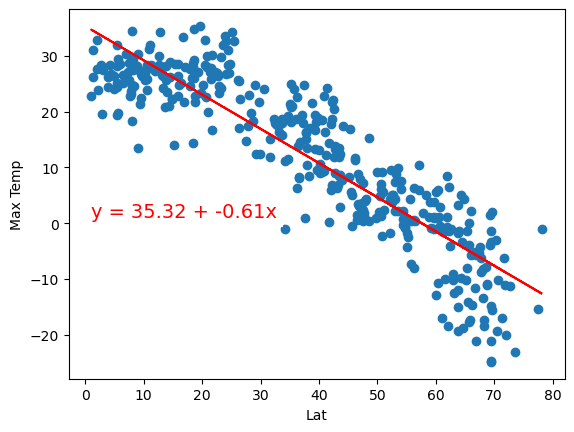

In [16]:
# Linear regression on Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

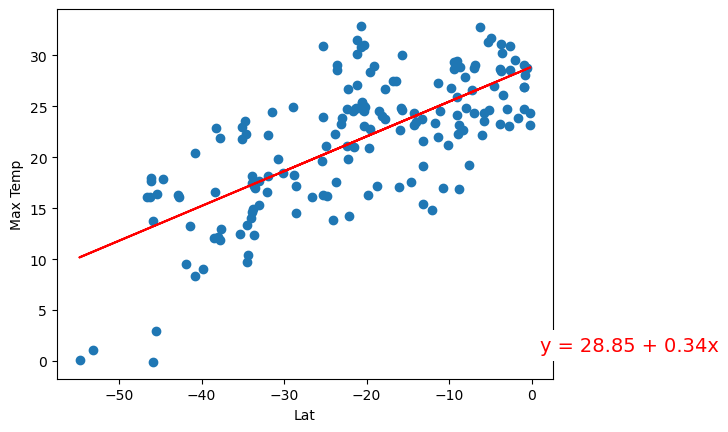

In [24]:
# Linear regression on Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** There is a clear and strong linear relationship in both hemispheres between Latitude and Max Temperature

### Humidity vs. Latitude Linear Regression Plot

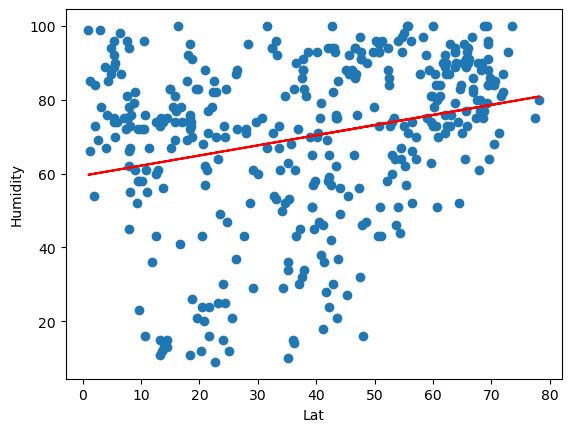

In [25]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

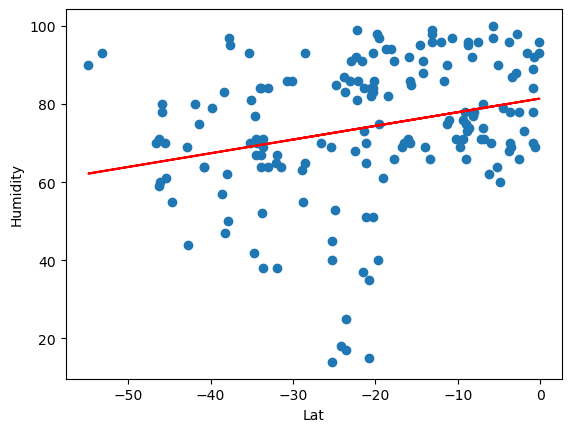

In [26]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** There is a linear realtionship between latitude and humidity as well but not as strong as temperature

### Cloudiness vs. Latitude Linear Regression Plot

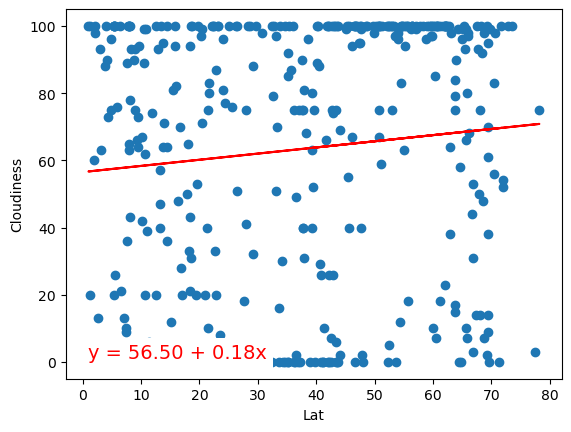

In [28]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

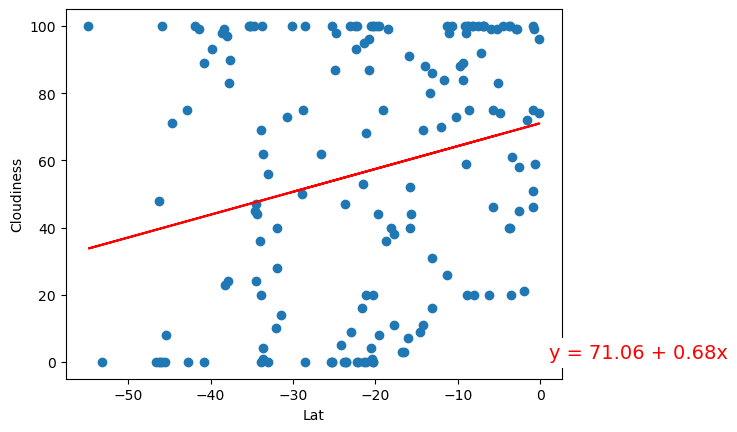

In [27]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** I think it is difficult to discern any linear relationship in either hemisphere between cloudiness and latitude

### Wind Speed vs. Latitude Linear Regression Plot

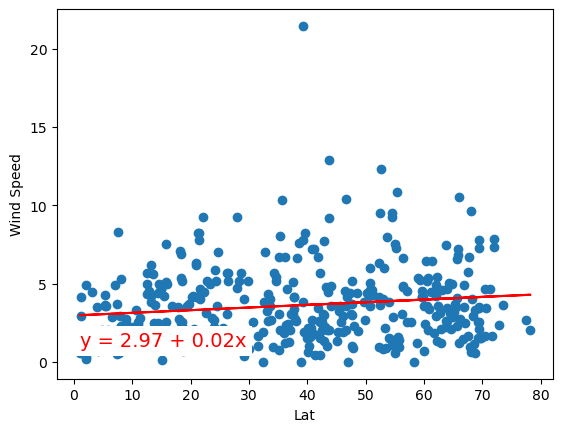

In [29]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

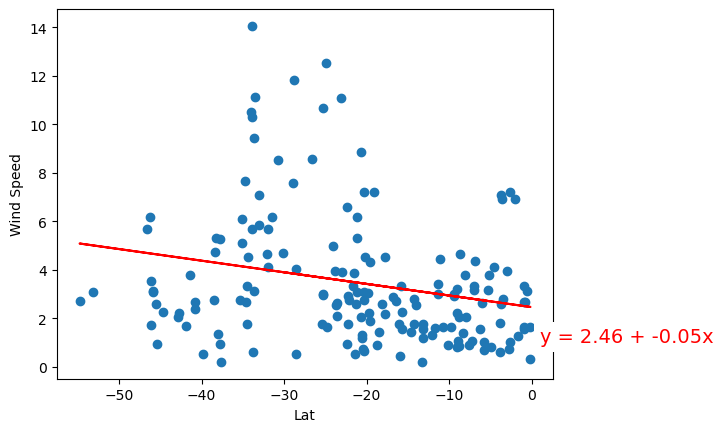

In [30]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** You might be able to claim there is some relationship between latitude and wind speed in yje 